In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
def create_model(input_shape=(224, 224, 3)):
    """
    Create a CNN model for binary classification
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [3]:
def prepare_data(data_dir, img_height=224, img_width=224, batch_size=32):
    """
    Prepare and augment the training and validation data
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

In [4]:
def train_model(model, train_generator, validation_generator, epochs=50):
    """
    Train the model and return training history
    """
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Add early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    return history

In [5]:
def plot_training_history(history):
    """
    Plot training and validation accuracy/loss
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

In [6]:
def evaluate_model(model, test_generator):
    """
    Evaluate the model and print classification report
    """
    # Get predictions
    predictions = model.predict(test_generator)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = test_generator.classes

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes))

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

GPU Available:  []
Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,729 (9.50 MB)

 Trainable params: 2,489,729 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5312 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss: 0.8457
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5625 - loss: 0.7412 - val_accuracy: 0.5000 - val_loss: 1.5173
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 1.4567 - val_accuracy: 0.5000 - val_loss: 0.7226
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5625 - loss: 0.7087 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5312 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6832 - val_accuracy: 0.5000 - val_loss: 0.6854
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5312 - loss: 0.6732 - val_accuracy: 0.5000 - val_loss: 0.6821
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.6534 - val_accuracy: 0.5000 - val_loss: 0.6745
Epoch 9/50
1/1

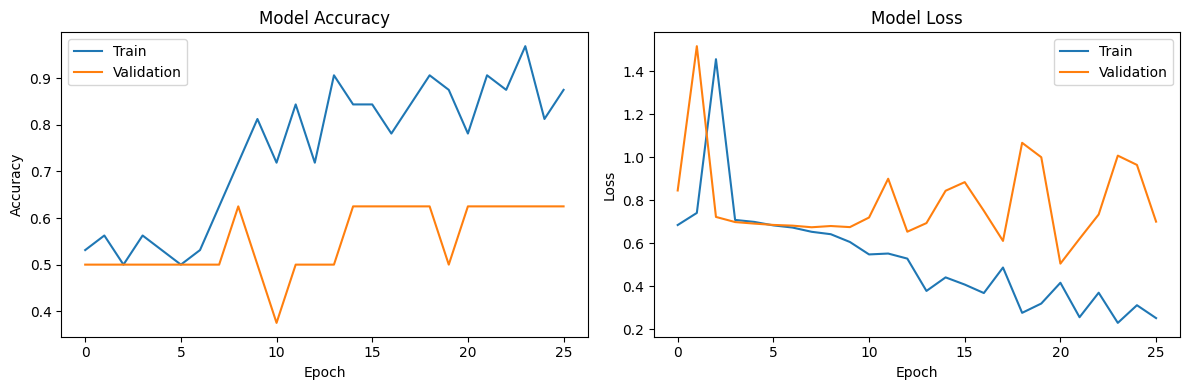

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.50      0.50      0.50         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.50      0.50      0.50         8



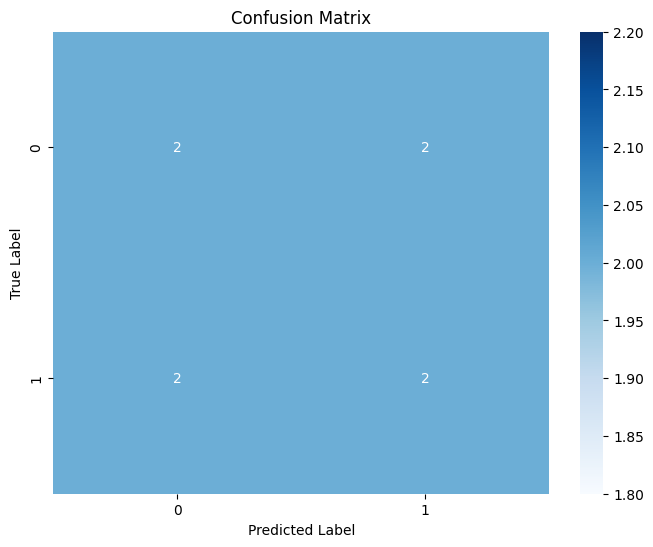

In [7]:
def main():
    # Set parameters
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    BATCH_SIZE = 32
    EPOCHS = 50
    
    # Replace with your dataset directory
    DATA_DIR = 'dataset'
    
    # Ensure GPU is being used if available
    print("GPU Available: ", tf.config.list_physical_devices('GPU'))
    
    # Prepare data
    train_generator, validation_generator = prepare_data(
        DATA_DIR,
        IMG_HEIGHT,
        IMG_WIDTH,
        BATCH_SIZE
    )
    
    # Create and train model
    model = create_model((IMG_HEIGHT, IMG_WIDTH, 3))
    model.summary()
    
    # Train model
    history = train_model(model, train_generator, validation_generator, EPOCHS)
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate model
    evaluate_model(model, validation_generator)
    
    # Save model
    model.save('oral_cancer_model.keras')

if __name__ == "__main__":
    main()

GPU Available:  []
Found 528 files belonging to 2 classes.
Using 423 files for training.
Found 528 files belonging to 2 classes.
Using 105 files for validation.


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 528 files belonging to 2 classes.
Using 423 files for training.
Class Weights: {0: 2.9788732394366195, 1: 0.6008522727272727}
Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.5099 - loss: 3.1657 - val_accuracy: 0.2571 - val_loss: 2.9372
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.5399 - loss: 2.9012 - val_accuracy: 0.7810 - val_loss: 2.7560
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.5405 - loss: 2.8318 - val_accuracy: 0.7905 - val_loss: 2.5944
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.5305 - loss: 2.6902 - val_accuracy: 0.5333 - val_loss: 2.4748
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.4647 - loss: 2.5212 - val_accuracy: 0.7810 - val_loss: 2.3295
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.5422 - loss: 2.2878 - val_accuracy: 0.6000 - val_loss: 2.2205
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5089 - loss: 2.1879 - val_accuracy: 0.1714 - val

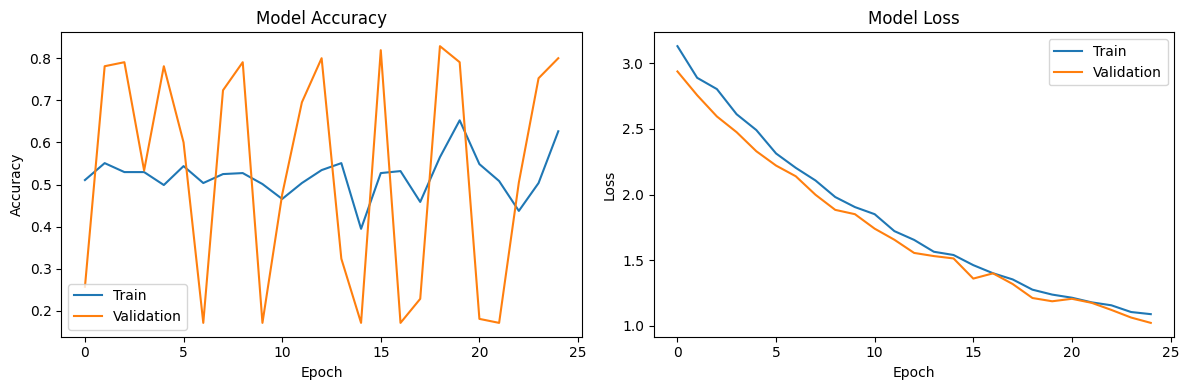

4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.82      0.97      0.89        87

    accuracy                           0.80       105
   macro avg       0.41      0.48      0.44       105
weighted avg       0.68      0.80      0.74       105



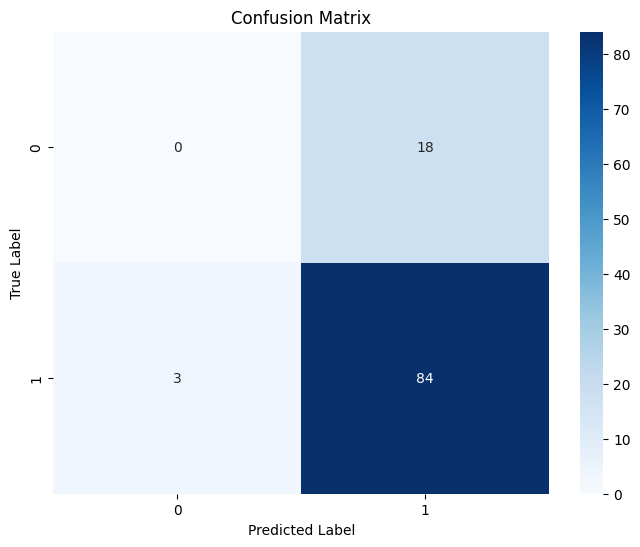

In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import ResNet50
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def create_resnet_model(input_shape=(224, 224, 3)):

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

def prepare_data(data_dir, img_height=224, img_width=224, batch_size=32):
    
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),
    ])
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset='training',
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    val_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset='validation',
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

    return train_dataset, val_dataset

def train_model(model, train_dataset, val_dataset, epochs=25):
    raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
        'dataset',
        validation_split=0.2,
        subset='training',
        seed=123
    )
    class_names = raw_train_dataset.class_names
    
    class_labels = np.concatenate([y.numpy() for _, y in raw_train_dataset], axis=0)
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_labels),
        y=class_labels
    )
    class_weights = dict(enumerate(class_weights))
    
    print("Class Names:", class_names)
    print("Class Weights:", class_weights)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
    )


    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler]
    )

    return history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_dataset):

    predictions = model.predict(test_dataset)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes))

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def main():
    # Set parameters
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    BATCH_SIZE = 32
    EPOCHS = 25
    
    # Replace with your dataset directory
    DATA_DIR = 'dataset'
    
    # Ensure GPU is being used if available
    print("GPU Available: ", tf.config.list_physical_devices('GPU'))
    
    # Prepare data
    train_dataset, val_dataset = prepare_data(
        DATA_DIR,
        IMG_HEIGHT,
        IMG_WIDTH,
        BATCH_SIZE
    )
    
    # Create and train model
    model = create_resnet_model((IMG_HEIGHT, IMG_WIDTH, 3))
    model.summary()
    
    # Train model
    history = train_model(model, train_dataset, val_dataset, EPOCHS)
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate model
    evaluate_model(model, val_dataset)
    
    # Save model
    model.save('oral_cancer_resnet_model.keras')

if __name__ == "__main__":
    main()